##EDA-1

In [ ]:

import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('BIKE DETAILS.csv')


Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
#1. What is the range of selling prices in the dataset?
min_price = df['selling_price'].min() # Changed 'Selling_Price' to 'selling_price'
max_price = df['selling_price'].max() # Changed 'Selling_Price' to 'selling_price'
print("Range of selling prices:", min_price, "-", max_price)

Range of selling prices: 5000 - 760000


In [ ]:
#2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print("Median selling price:", median_price)

Median selling price: 45000.0


In [ ]:
#3.What is the most common seller type?
seller_type_counts = df['seller_type'].value_counts()
most_common_seller_type = seller_type_counts.idxmax()
print("Most common seller type:", most_common_seller_type)

Most common seller type: Individual


In [ ]:
#4.How many bikes have driven more than 50,000 kilometers?
bikes_driven_more_than_50k = df[df['km_driven'] > 50000]
num_bikes_driven_more_than_50k = len(bikes_driven_more_than_50k)
print("Number of bikes driven more than 50,000 kilometers:", num_bikes_driven_more_than_50k)


Number of bikes driven more than 50,000 kilometers: 170


In [ ]:
#5.What is the average km_driven value for each ownership type?
# Assuming the correct column name is 'owner' based on the dataset
avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(avg_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
#6.What proportion of bikes are from the year 2015 or older?
bikes_from_2015_or_older = df[df['year'] >= 2015]
total_bikes = len(df)
proportion_from_2015_or_older = len(bikes_from_2015_or_older) / total_bikes
print("Proportion of bikes from the year 2015 or older:", proportion_from_2015_or_older)

Proportion of bikes from the year 2015 or older: 0.527803958529689


In [ ]:
#7.What is the trend of missing values across the dataset?
missing_values_trend = df.isnull().sum() / len(df)
print("Trend of missing values across the dataset:")
print(missing_values_trend)

Trend of missing values across the dataset:
name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [ ]:
#8.What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_ex_showroom_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]
print("Highest ex_showroom_price recorded:", highest_ex_showroom_price)
print("Bike with highest ex_showroom_price:")
print(bike_with_highest_ex_showroom_price)

Highest ex_showroom_price recorded: 1278000.0
Bike with highest ex_showroom_price:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [ ]:
#9.What is the total number of bikes listed by each seller type?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Relationship between selling_price and km_driven for first-owner bikes:
Axes(0.125,0.11;0.775x0.77)


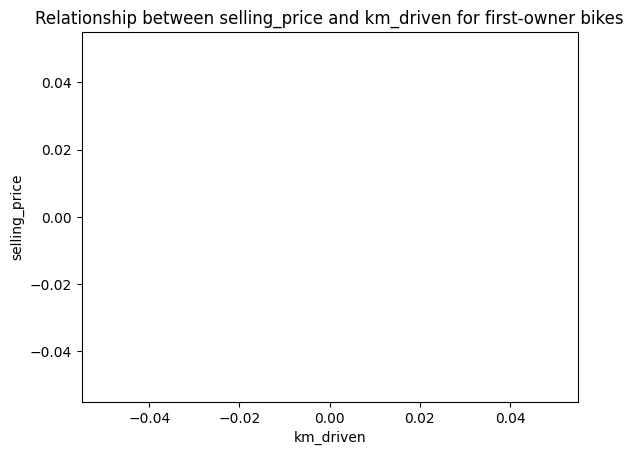

In [ ]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == 'First Owner']
selling_price_vs_km_driven_first_owner = first_owner_bikes.plot(kind='scatter', x='km_driven', y='selling_price', title='Relationship between selling_price and km_driven for first-owner bikes')
print("Relationship between selling_price and km_driven for first-owner bikes:")
print(selling_price_vs_km_driven_first_owner)

In [ ]:
#11.Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df_without_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Outliers in km_driven column:")
print(outliers)

Outliers in km_driven column:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548     

Bivariate analysis of year and selling_price:
Axes(0.125,0.11;0.775x0.77)


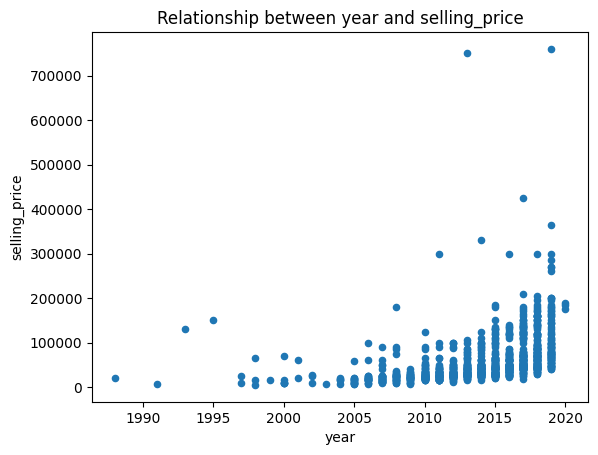

In [ ]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price?
year_vs_selling_price = df.plot(kind='scatter', x='year', y='selling_price', title='Relationship between year and selling_price')
print("Bivariate analysis of year and selling_price:")
print(year_vs_selling_price)


In [ ]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
#year)
current_year = 2023
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print("Average depreciation in selling price based on bike's age:")
print(average_depreciation_by_age)

Average depreciation in selling price based on bike's age:
age
3     34260.000000
4     -2954.562500
5    -13023.194805
6    -22306.082353
7    -28328.190476
8    -28013.275000
9    -34505.606061
10   -43086.886792
11   -37317.648649
12   -47102.666667
13   -45658.928571
14   -38227.785714
15   -54732.428571
16   -42399.000000
17   -39664.500000
18   -44852.000000
19   -36852.000000
20             NaN
21             NaN
22   -34852.000000
23             NaN
24             NaN
25             NaN
26             NaN
28             NaN
30             NaN
32             NaN
35             NaN
Name: depreciation, dtype: float64


In [ ]:
#14.Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price_year'] = df['year'].map(average_price_by_year)
significant_priced_bikes = df[df['selling_price'] > df['average_price_year']]
print("Bike names priced significantly above the average price for their manufacturing year:")
print(significant_priced_bikes['name'])


Bike names priced significantly above the average price for their manufacturing year:
0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 334, dtype: object


In [ ]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
correlation_heatmap = correlation_matrix.style.background_gradient(cmap='coolwarm')
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
                    selling_price      year  km_driven  ex_showroom_price  \
selling_price            1.000000  0.402188  -0.212937           0.918583   
year                     0.402188  1.000000  -0.288675           0.126378   
km_driven               -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price        0.918583  0.126378  -0.122011           1.000000   
age                     -0.402188 -1.000000   0.288675          -0.126378   
depreciation            -0.345663  0.343490  -0.066531          -0.688385   
average_price_year       0.501140  0.802547  -0.309402           0.146598   

                         age  depreciation  average_price_year  
selling_price      -0.402188     -0.345663            0.501140  
year               -1.000000      0.343490            0.802547  
km_driven           0.288675     -0.066531           -0.309402  
ex_showroom_price  -0.126378     -0.688385            0.146598  
age                 1.000000     -0.34

##EDA-2

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('Car Sale.csv')

Saving Car Sale.csv to Car Sale.csv


In [ ]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by dealer and calculate average price
average_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()

# Print the result
print(average_price_by_dealer)



Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends?
import pandas as pd

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by car brand and calculate price variation
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()



In [ ]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
#trends?

import pandas as pd

# Sample data
data = {
    'Brand': ['Ford', 'Honda', 'Toyota', 'Kia'],
    'Model': ['F-150 Lightning', 'CR-V', 'Tundra', 'EV6'],
    'Price 2022': [41669, 26800, 35990, 42695],
    'Price 2023': [59974, 31110, 37865, 7100 + 42695]
}

df = pd.DataFrame(data)

# Calculate price variation
df['Price Variation'] = df['Price 2023'] - df['Price 2022']
df['Percentage Change'] = (df['Price Variation'] / df['Price 2022']) * 100

print(df)


    Brand            Model  Price 2022  Price 2023  Price Variation  \
0    Ford  F-150 Lightning       41669       59974            18305   
1   Honda             CR-V       26800       31110             4310   
2  Toyota           Tundra       35990       37865             1875   
3     Kia              EV6       42695       49795             7100   

   Percentage Change  
0          43.929540  
1          16.082090  
2           5.209780  
3          16.629582  


In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')


Manual Transmission:
Median Price: 22001.0
Interquartile Range (IQR): 17000.0

Automatic Transmission:
Median Price: nan
Interquartile Range (IQR): nan


<ipython-input-46-8913c7433e4f>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([manual_prices, automatic_prices], labels=['Manual', 'Automatic'])


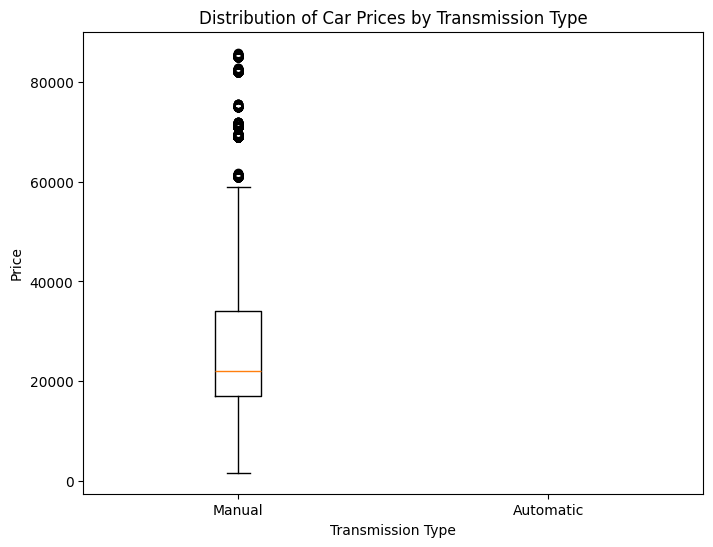

In [ ]:
#3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by transmission type and calculate statistics
manual_prices = df[df['Transmission'] == 'Manual']['Price ($)']
automatic_prices = df[df['Transmission'] == 'Automatic']['Price ($)']

print("Manual Transmission:")
print(f"Median Price: {manual_prices.median()}")
print(f"Interquartile Range (IQR): {manual_prices.quantile(0.75) - manual_prices.quantile(0.25)}")

print("\nAutomatic Transmission:")
print(f"Median Price: {automatic_prices.median()}")
print(f"Interquartile Range (IQR): {automatic_prices.quantile(0.75) - automatic_prices.quantile(0.25)}")

# Create box plots
plt.figure(figsize=(8,6))
plt.boxplot([manual_prices, automatic_prices], labels=['Manual', 'Automatic'])
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

Region: Middletown
Median Price: 22750.0
Interquartile Range (IQR): 16000.0

Region: Aurora
Median Price: 23000.0
Interquartile Range (IQR): 16999.0

Region: Greenville
Median Price: 22500.0
Interquartile Range (IQR): 16499.0

Region: Pasco
Median Price: 23000.0
Interquartile Range (IQR): 15499.5

Region: Janesville
Median Price: 23000.0
Interquartile Range (IQR): 15999.0

Region: Scottsdale
Median Price: 22600.0
Interquartile Range (IQR): 15500.0

Region: Austin
Median Price: 23801.0
Interquartile Range (IQR): 17000.0



<ipython-input-49-e496701e6de7>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Dealer_Region'] == region]['Price ($)'] for region in regions], labels=regions)


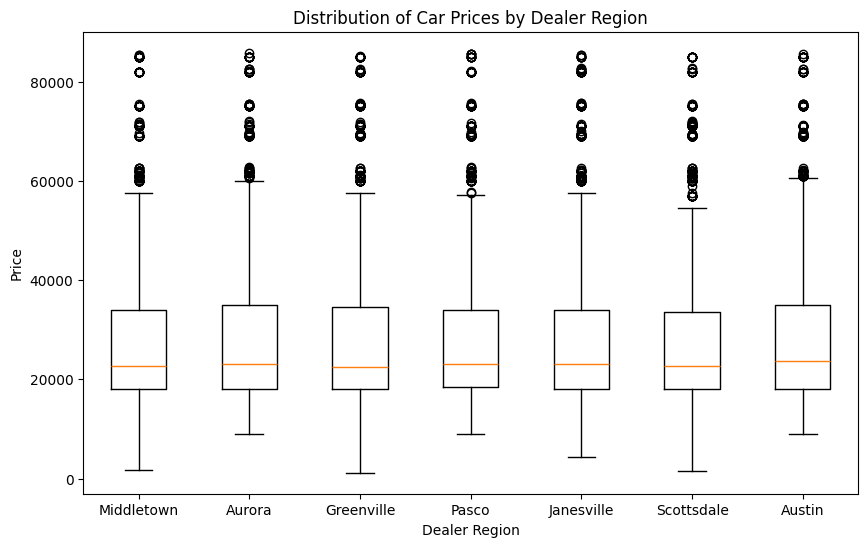

In [ ]:
#4.What is the distribution of car prices across different regions
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by dealer region and calculate statistics
regions = df['Dealer_Region'].unique()

for region in regions:
    prices = df[df['Dealer_Region'] == region]['Price ($)']
    print(f"Region: {region}")
    print(f"Median Price: {prices.median()}")
    print(f"Interquartile Range (IQR): {prices.quantile(0.75) - prices.quantile(0.25)}")
    print()

# Create box plots
plt.figure(figsize=(10,6))
plt.boxplot([df[df['Dealer_Region'] == region]['Price ($)'] for region in regions], labels=regions)
plt.title('Distribution of Car Prices by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price')
plt.show()


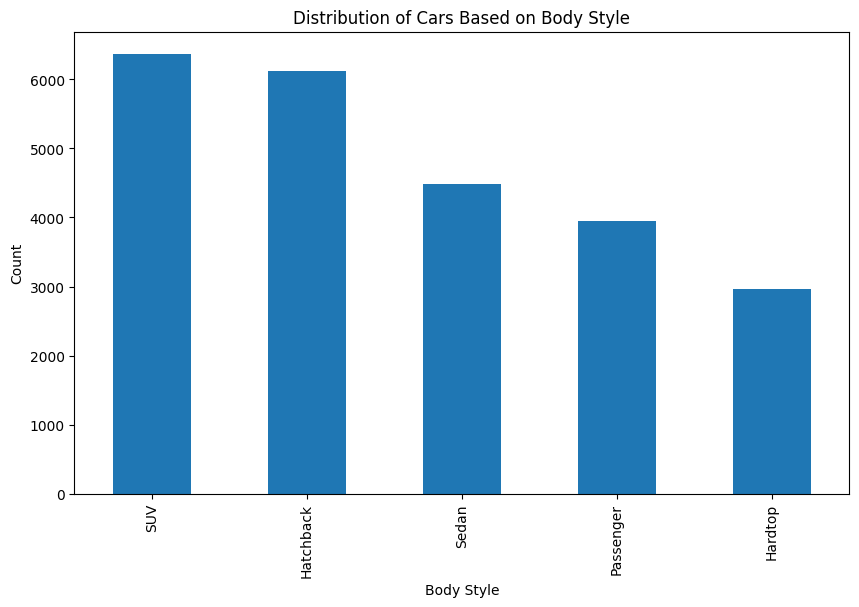

In [ ]:
#5. What is the distribution of cars based on body styles?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Count body styles
body_style_counts = df['Body Style'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))
body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars Based on Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()


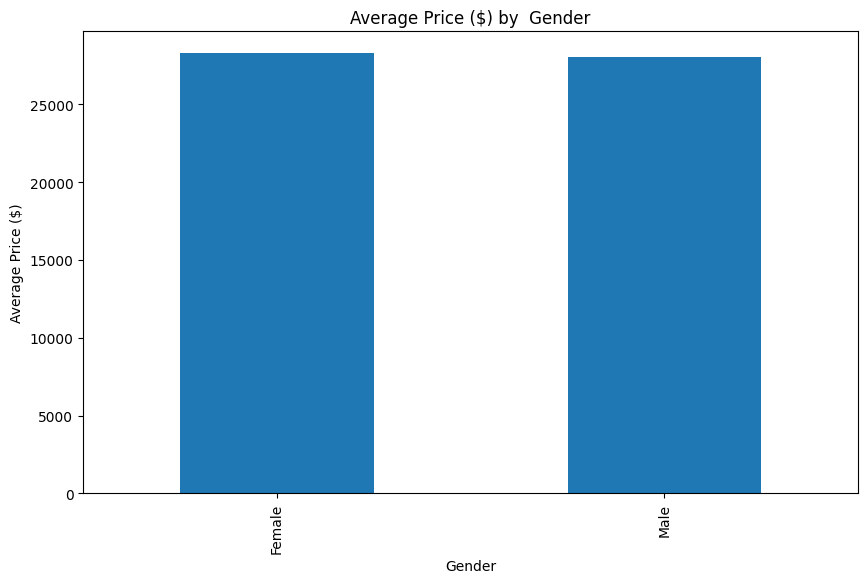

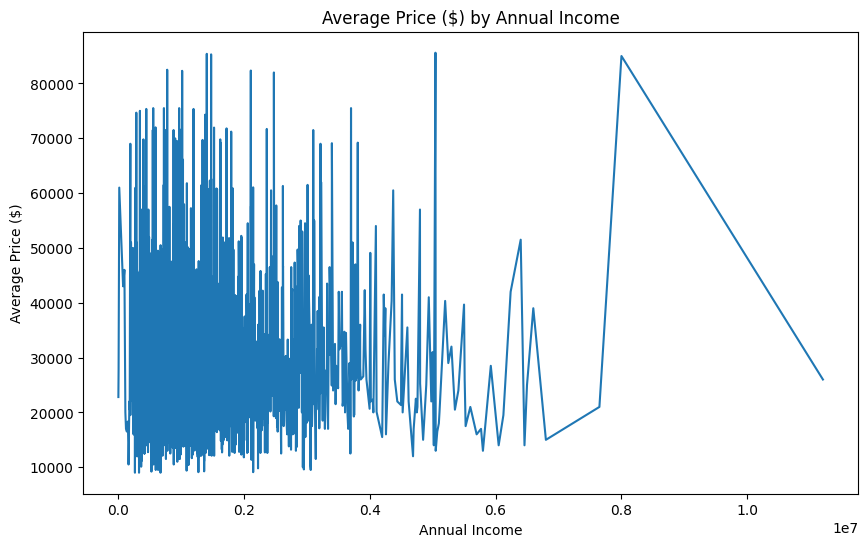

In [ ]:
#6.How does the average selling price of cars vary by customer gender and annual income?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by customer gender and calculate average selling price
avg_price_by_gender = df.groupby('Gender')['Price ($)'].mean()

# Group by annual income and calculate average selling price
avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean()

# Create bar charts
plt.figure(figsize=(10,6))
avg_price_by_gender.plot(kind='bar')
plt.title('Average Price ($) by  Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.show()

plt.figure(figsize=(10,6))
avg_price_by_income.plot(kind='line')
plt.title('Average Price ($) by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Price ($)')
plt.show()


Dealer_Region: Middletown
Median Price: 22750.0
Mean Price: 27856.338874680307
Standard Deviation: 14619.842394964304

Dealer_Region: Aurora
Median Price: 23000.0
Mean Price: 28334.626837060703
Standard Deviation: 15026.207251584648

Dealer_Region: Greenville
Median Price: 22500.0
Mean Price: 28180.81905370844
Standard Deviation: 15101.538328356595

Dealer_Region: Pasco
Median Price: 23000.0
Mean Price: 28119.039923347173
Standard Deviation: 14659.315940545499

Dealer_Region: Janesville
Median Price: 23000.0
Mean Price: 27833.35095524732
Standard Deviation: 14344.995637517959

Dealer_Region: Scottsdale
Median Price: 22600.0
Mean Price: 27954.958928051266
Standard Deviation: 14902.916819534204

Dealer_Region: Austin
Median Price: 23801.0
Mean Price: 28341.60362756953
Standard Deviation: 14903.88454863139



<ipython-input-61-6991cc7138ae>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Dealer_Region'] == region]['Price ($)'] for region in regions], labels=regions)


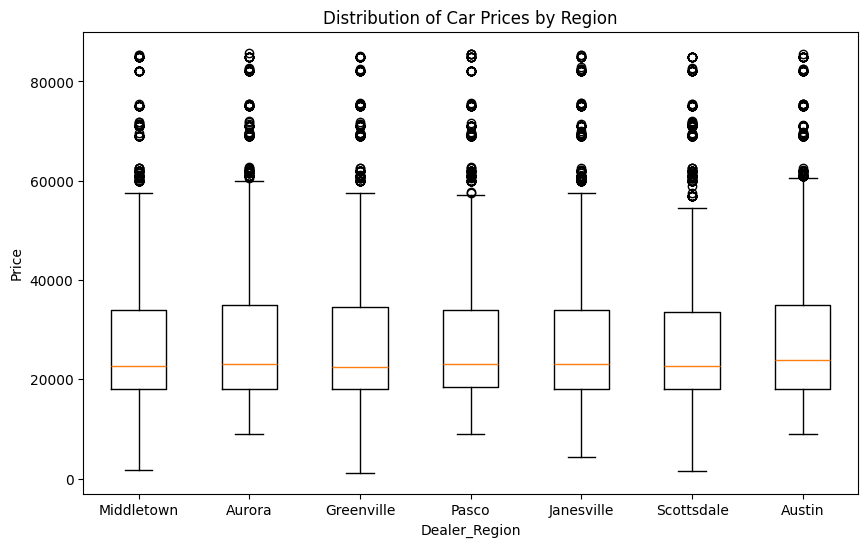

In [ ]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')


# Group by region and calculate statistics
regions = df['Dealer_Region'].unique()

for region in regions:
    prices = df[df['Dealer_Region'] == region]['Price ($)']
    print(f"Dealer_Region: {region}")
    print(f"Median Price: {prices.median()}")
    print(f"Mean Price: {prices.mean()}")
    print(f"Standard Deviation: {prices.std()}")
    print()

# Create box plots
plt.figure(figsize=(10,6))
plt.boxplot([df[df['Dealer_Region'] == region]['Price ($)'] for region in regions], labels=regions)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price')
plt.show()



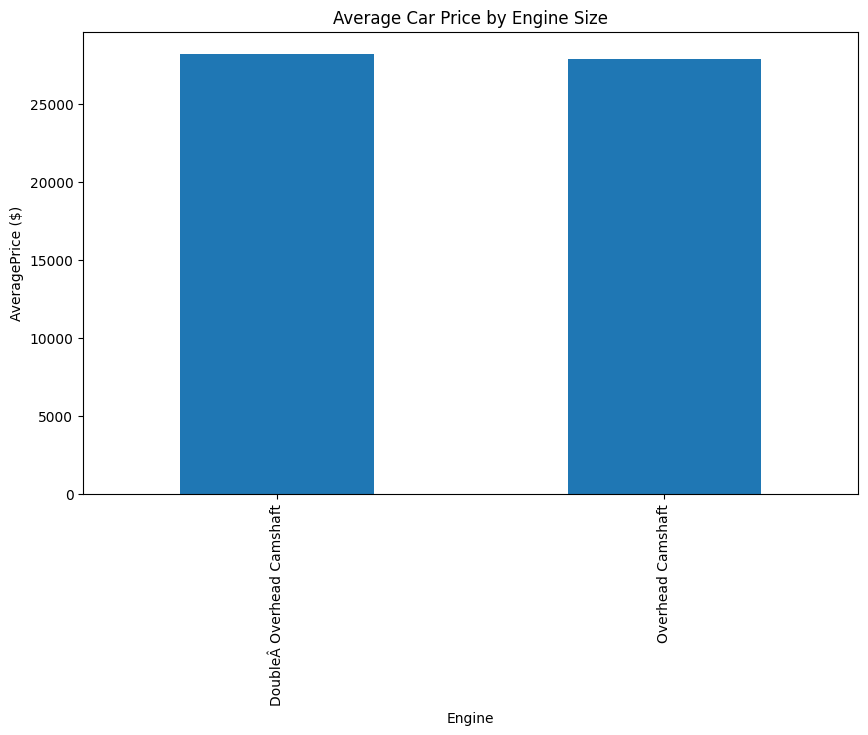

In [ ]:
#8.How does the average car price differ between cars with different engine sizes?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by engine size and calculate average price
avg_price_by_engine_size = df.groupby('Engine')['Price ($)'].mean()

# Create a bar chart
plt.figure(figsize=(10,6))
avg_price_by_engine_size.plot(kind='bar')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine')
plt.ylabel('AveragePrice ($)')
plt.show()


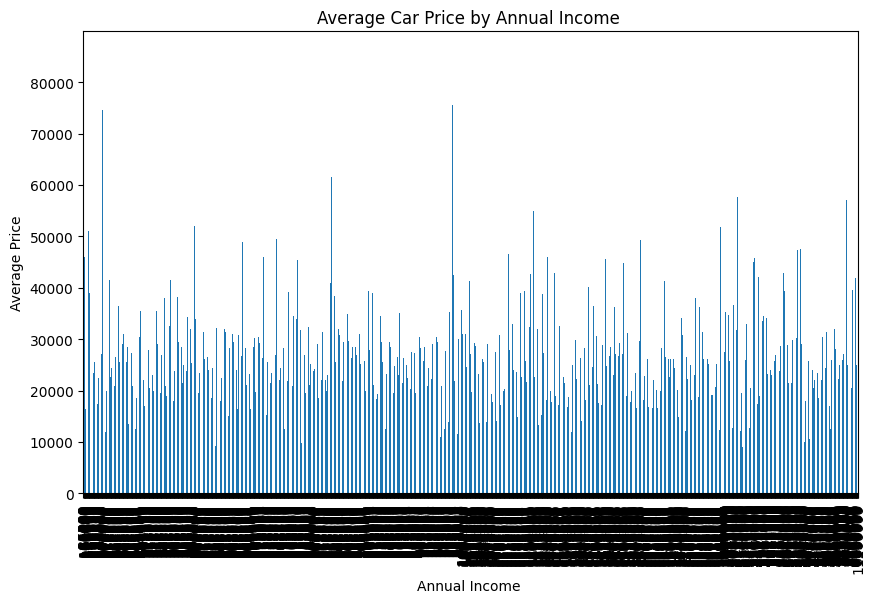

In [ ]:
#9. How do car prices vary based on the customer’s annual income bracket?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')
# Group by annual income bracket and calculate average price
avg_price_by_income_bracket = df.groupby('Annual Income')['Price ($)'].mean()

# Create a bar chart
plt.figure(figsize=(10,6))
avg_price_by_income_bracket.plot(kind='bar')
plt.title('Average Car Price by Annual Income ')
plt.xlabel('Annual Income ')
plt.ylabel('Average Price')
plt.show()


In [ ]:
  #10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Count the number of sales for each car model
model_counts = df['Model'].value_counts()

# Get the top 5 car models
top_5_models = model_counts.nlargest(5)

# Print the top 5 car models
print(top_5_models)


Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


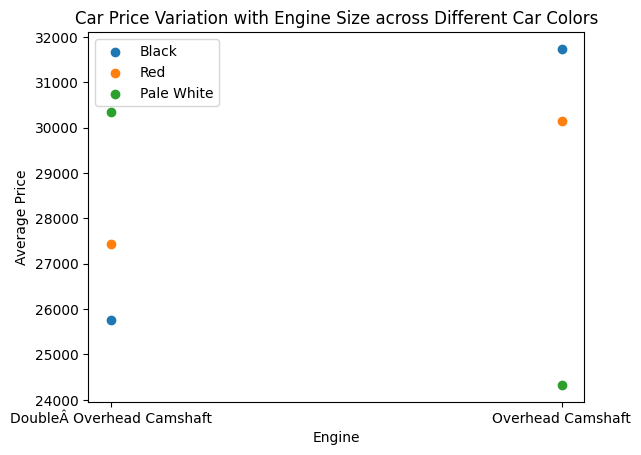

In [ ]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price
#variation?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by car color and engine size, and calculate average price
# Changed 'Price($)' to 'Price ($)'
avg_price_by_color_engine = df.groupby(['Color', 'Engine'])['Price ($)'].mean().reset_index()

# Create a scatter plot
for color in df['Color'].unique():
    color_df = avg_price_by_color_engine[avg_price_by_color_engine['Color'] == color]
    plt.scatter(color_df['Engine'], color_df['Price ($)'], label=color) # Changed 'Price($)' to 'Price ($)'

plt.legend()
plt.title('Car Price Variation with Engine Size across Different Car Colors')
plt.xlabel('Engine')
plt.ylabel('Average Price')
plt.show()

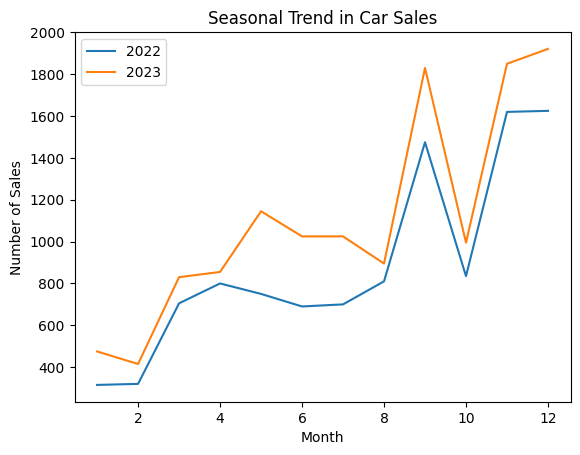

In [ ]:
#12.  Is there any seasonal trend in car sales based on the date of sale?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from date column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month and year, and calculate number of sales
sales_by_month = df.groupby(['Year', 'Month'])['Price ($)'].count().reset_index()

# Create a line plot
for year in sales_by_month['Year'].unique():
    year_df = sales_by_month[sales_by_month['Year'] == year]
    # Changed 'Price($)' to 'Price ($)' to match the column name in sales_by_month
    plt.plot(year_df['Month'], year_df['Price ($)'], label=year)

plt.legend()
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

Body_Style: SUV, Transmission: Auto
Mean Price: 27501.40440699935
Median Price: 25000.0
Standard Deviation: 13299.927913031399

Body_Style: SUV, Transmission: Manual
Mean Price: 26079.019160583943
Median Price: 22000.0
Standard Deviation: 14621.526541276666

Body_Style: Passenger, Transmission: Auto
Mean Price: 28915.835148514852
Median Price: 25000.0
Standard Deviation: 13946.48193248987

Body_Style: Passenger, Transmission: Manual
Mean Price: 28969.52103896104
Median Price: 22000.0
Standard Deviation: 18523.684163463106

Body_Style: Hatchback, Transmission: Auto
Mean Price: 25910.544823597455
Median Price: 21500.0
Standard Deviation: 13144.014337357168

Body_Style: Hatchback, Transmission: Manual
Mean Price: 28702.550561797754
Median Price: 23000.0
Standard Deviation: 16284.049615762025

Body_Style: Hardtop, Transmission: Auto
Mean Price: 31520.188210227272
Median Price: 27000.0
Standard Deviation: 13687.756739800805

Body_Style: Hardtop, Transmission: Manual
Mean Price: 27016.943698

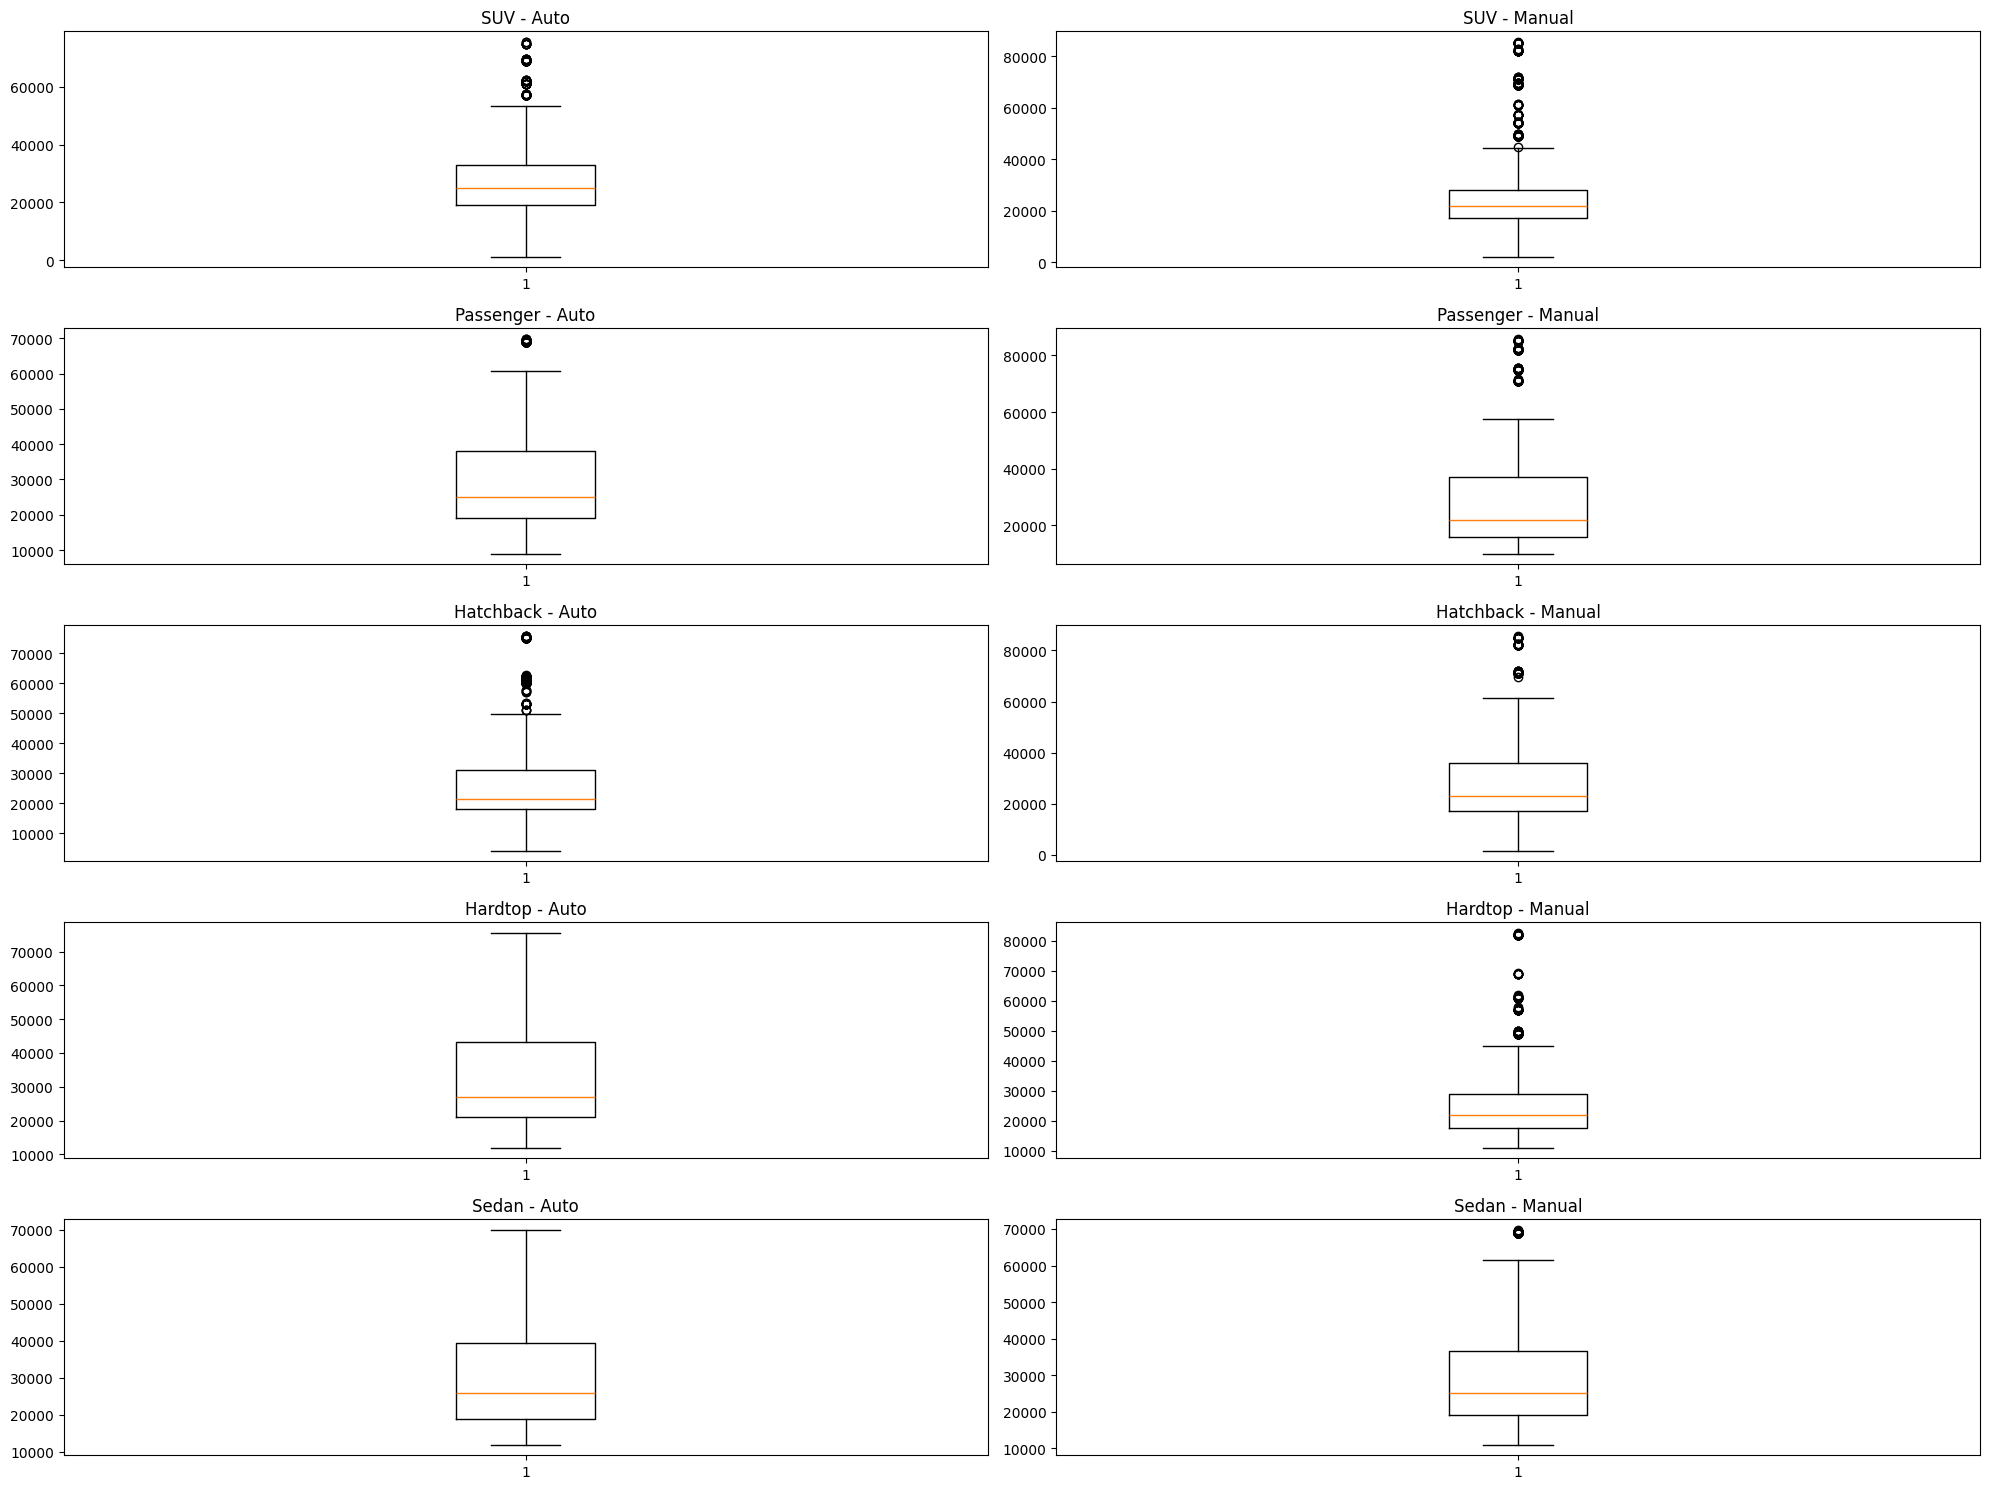

In [ ]:
#13.How does the car price distribution change when considering different combinations of body style and
#transmission type?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by body style and transmission type, and calculate statistics
body_styles = df['Body Style'].unique() # Changed Body_Style to body_styles for consistency and to avoid shadowing the outer variable
transmission_types = df['Transmission'].unique() # Changed transmission_Types to transmission_types for consistency


for body_style in body_styles:
    for transmission_type in transmission_types:
        group_df = df[(df['Body Style'] == body_style) & (df['Transmission'] == transmission_type)]
        if not group_df.empty:
            print(f"Body_Style: {body_style}, Transmission: {transmission_type}") # Changed Body_Style to body_style for consistency
            # Changed 'Price($)' to 'Price ($)' to match the actual column name in the DataFrame
            print(f"Mean Price: {group_df['Price ($)'].mean()}")
            print(f"Median Price: {group_df['Price ($)'].median()}")
            print(f"Standard Deviation: {group_df['Price ($)'].std()}")
            print()

# Create box plots
fig, axs = plt.subplots(len(body_styles), len(transmission_types), figsize=(20, 15))
for i, body_style in enumerate(body_styles):
    for j, transmission_type in enumerate(transmission_types):
        group_df = df[(df['Body Style'] == body_style) & (df['Transmission'] == transmission_type)]
        if not group_df.empty:
            axs[i, j].boxplot(group_df['Price ($)']) # Changed 'Price($)' to 'Price ($)'
            axs[i, j].set_title(f"{body_style} - {transmission_type}") # Changed Transmissio to transmission_type and body_style to body_style for consistency


plt.tight_layout()
plt.show()

                Price ($)  Engine_Numeric  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine_Numeric        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


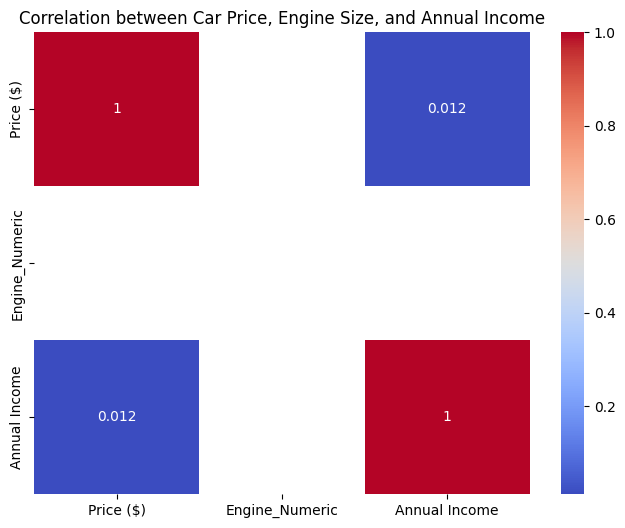

In [ ]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Extract numeric value from 'Engine' column (assuming format is "number Engine_type")
df['Engine_Numeric'] = pd.to_numeric(df['Engine'].str.extract('(\d+\.?\d*)', expand=False), errors='coerce')

# Calculate correlation matrix using the new numeric Engine column
# Changed 'Price($)' to 'Price ($)' to match the actual column name in the DataFrame
corr_matrix = df[['Price ($)', 'Engine_Numeric', 'Annual Income']].corr()

# Print correlation matrix
print(corr_matrix)

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Car Price, Engine Size, and Annual Income')
plt.show()

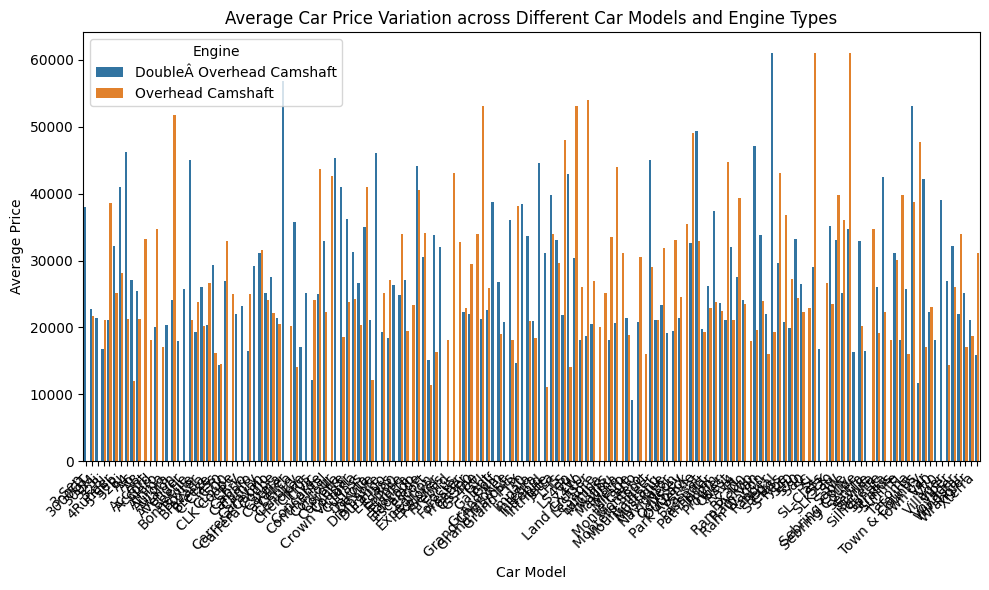

In [ ]:
#15. How does the average car price vary across different car models and engine types?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Group by car model and engine type, and calculate average price
# The column name in the original code was incorrect.
# It should be 'Price ($)' instead of 'Price($)'
avg_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10,6))
# The original code referenced 'Selling_Price' and 'Engine_Type',
# which are likely not present in the avg_price DataFrame.
# Instead, use 'Price ($)' and 'Engine' which are present.
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=avg_price)
plt.title('Average Car Price Variation across Different Car Models and Engine Types')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

##EDA-3

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('amazon.csv')

Saving amazon.csv to amazon.csv


In [ ]:
#1.What is the average rating for each product category?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert the 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by product category and calculate average rating
average_rating = df.groupby('category')['rating'].mean()

# Print the result
print(average_rating)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [ ]:
#2.What are the top rating_count products by category?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Group by category and calculate rating count
top_products = df.groupby(['category', 'product_name'])['rating_count'].sum().reset_index()

# Convert 'rating_count' to numeric before sorting
top_products['rating_count'] = pd.to_numeric(top_products['rating_count'], errors='coerce')

# Sort by rating count in descending order
top_products = top_products.sort_values(by='rating_count', ascending=False)

# Print top products
print(top_products.head(10))

                                              category  \
69   Computers&Accessories|Accessories&Peripherals|...   
42   Computers&Accessories|Accessories&Peripherals|...   
68   Computers&Accessories|Accessories&Peripherals|...   
151  Computers&Accessories|Accessories&Peripherals|...   
147  Computers&Accessories|Accessories&Peripherals|...   
112  Computers&Accessories|Accessories&Peripherals|...   
110  Computers&Accessories|Accessories&Peripherals|...   
66   Computers&Accessories|Accessories&Peripherals|...   
104  Computers&Accessories|Accessories&Peripherals|...   
111  Computers&Accessories|Accessories&Peripherals|...   

                                          product_name  rating_count  
69   Duracell USB Lightning Apple Certified (Mfi) B...   815815815.0  
42   Ambrane 2 in 1 Type-C & Micro USB Cable with 6...   602602602.0  
68   Duracell USB C To Lightning Apple Certified (M...   184184184.0  
151  Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...      974974.0  
147  W

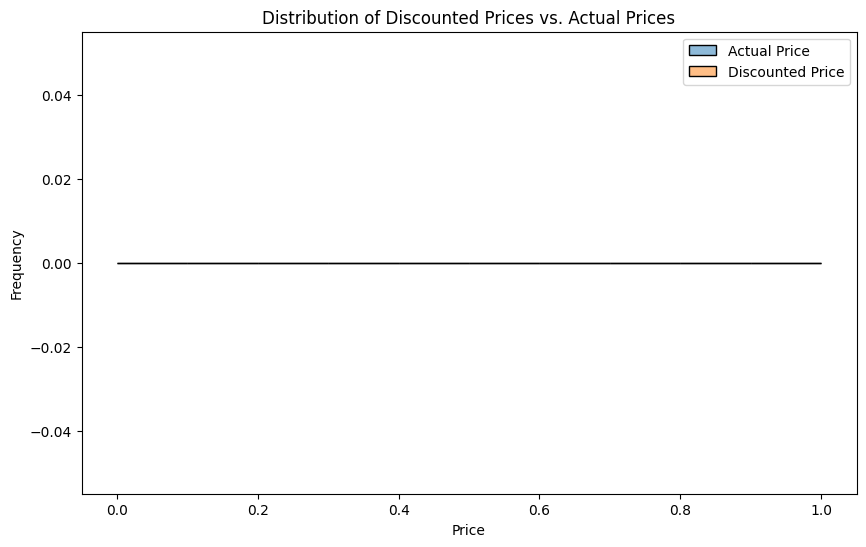

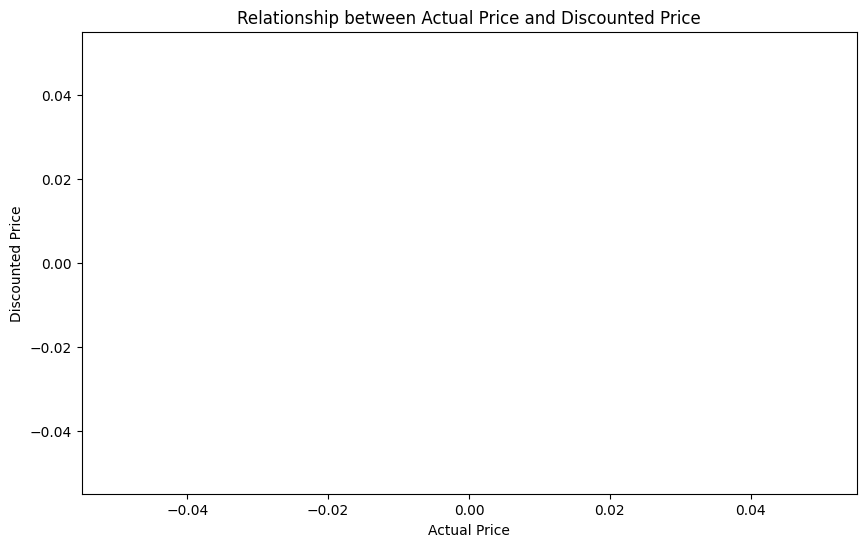

In [ ]:
#3.' What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for plotting

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert 'actual_price' and 'discounted_price' to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(',', ''), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace(',', ''), errors='coerce')

# Calculate discount
df['Discount'] = df['actual_price'] - df['discounted_price']

# Calculate discount percentage
df['Discount_Percentage'] = (df['Discount'] / df['actual_price']) * 100

# Create histograms
plt.figure(figsize=(10,6))
sns.histplot(df['actual_price'], bins=10, alpha=0.5, label='Actual Price')
sns.histplot(df['discounted_price'], bins=10, alpha=0.5, label='Discounted Price')
plt.legend()
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='actual_price', y='discounted_price', data=df)
plt.title('Relationship between Actual Price and Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()

In [ ]:
#4. How does the average discount percentage vary across categories?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read




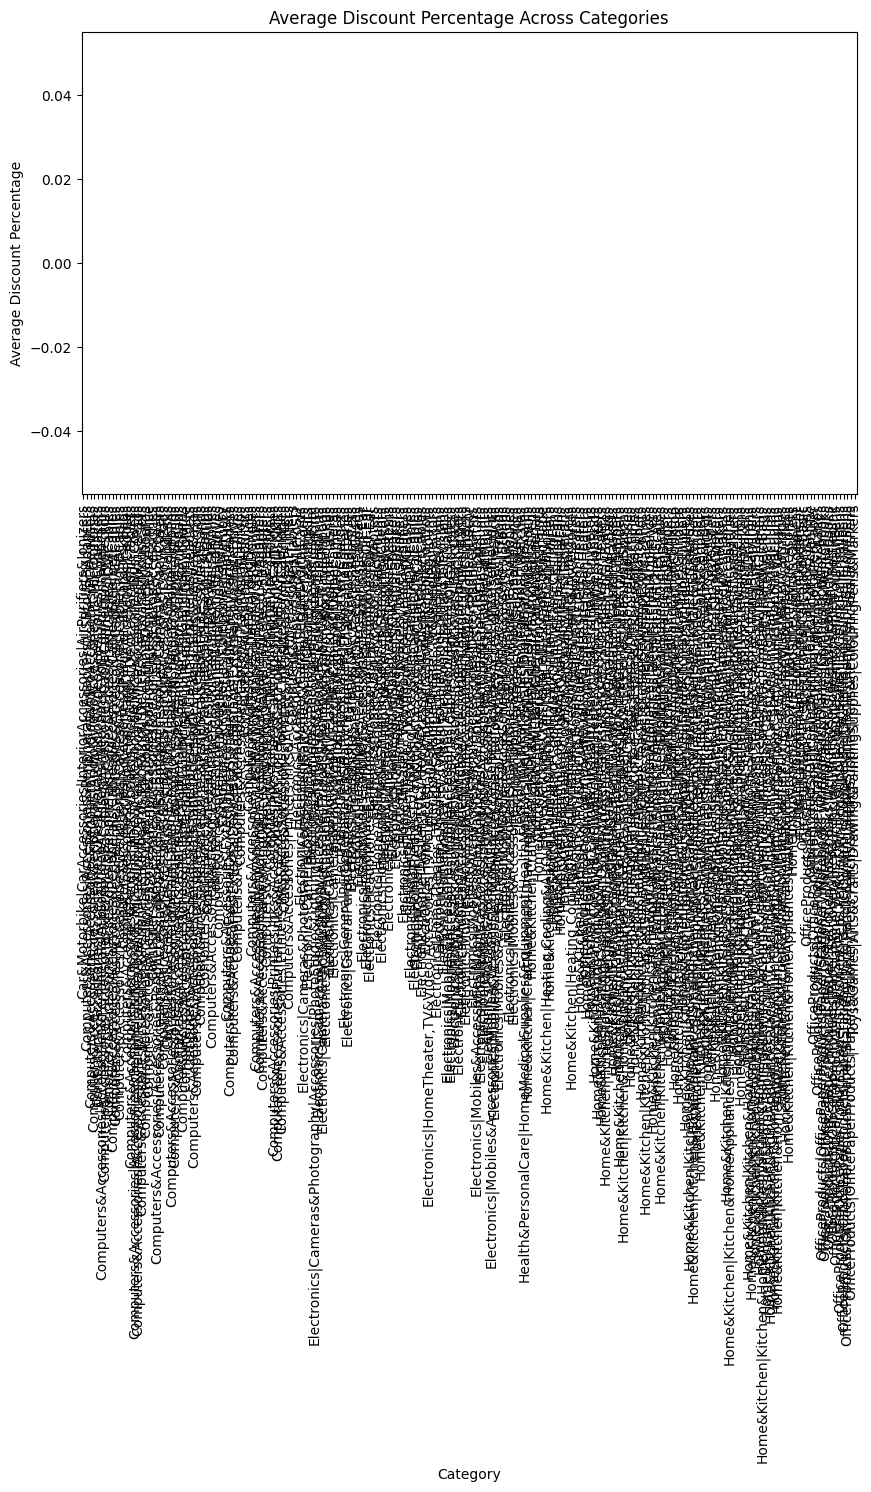

In [ ]:
#4. How does the average discount percentage vary across categories?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert 'actual_price' and 'discounted_price' to numeric
df['actual_price'] = pd.to_numeric(df['actual_price'].str.replace(',', ''), errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace(',', ''), errors='coerce')

# Calculate discount percentage
df['Discount_Percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

# Group by category and calculate average discount percentage
avg_discount_percentage = df.groupby('category')['Discount_Percentage'].mean().reset_index()

# Sort by average discount percentage in descending order
avg_discount_percentage = avg_discount_percentage.sort_values(by='Discount_Percentage', ascending=False)

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='Discount_Percentage', data=avg_discount_percentage)
plt.title('Average Discount Percentage Across Categories')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#5.What are the most popular product names?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Calculate frequency of product names
product_frequency = df['product_name'].value_counts().reset_index()
product_frequency.columns = ['Product_Name', 'Frequency']

# Sort by frequency in descending order
product_frequency = product_frequency.sort_values(by='Frequency', ascending=False)

# Print top product names
print(product_frequency.head(10))


                                         Product_Name  Frequency
0   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...          5
1   Fire-Boltt Phoenix Smart Watch with Bluetooth ...          4
26  Ambrane 60W / 3A Fast Charging Output Cable wi...          3
25  Duracell USB C To Lightning Apple Certified (M...          3
5   Fire-Boltt India's No 1 Smartwatch Brand Talk ...          3
23  AmazonBasics New Release Nylon USB-A to Lightn...          3
7   Ambrane Unbreakable 60W / 3A Fast Charging 1.5...          3
6   Wayona Nylon Braided USB to Lightning Fast Cha...          3
22  Amazon Basics USB Type-C to USB-A 2.0 Male Fas...          3
21  Pinnaclz Original Combo of 2 Micro USB Fast Ch...          3


In [ ]:
#6. What are the most popular product keywords?

import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert product titles to lowercase
df['product_name'] = df['product_name'].str.lower()

# Split product titles into keywords
keywords = df['product_name'].str.split().explode()

# Calculate frequency of keywords
keyword_frequency = keywords.value_counts().reset_index()
keyword_frequency.columns = ['Keyword', 'Frequency']

# Sort by frequency in descending order
keyword_frequency = keyword_frequency.sort_values(by='Frequency', ascending=False)

# Print top keywords
print(keyword_frequency.head(10))


    Keyword  Frequency
0      with        751
1       for        672
2         |        457
3         &        432
4       usb        377
5       and        330
6     cable        320
7         -        220
8  charging        219
9        to        218


In [ ]:
#7. What are the most popular product reviews?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Sort reviews by rating in descending order
top_reviews = df.sort_values(by='rating', ascending=False)

# Print top reviews
print(top_reviews.head(10))


      product_id                                       product_name  \
1279  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
324   B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
174   B0BP7XLX48  Syncwire LTG to USB Cable for Fast Charging Co...   
775   B09ZHCJDP1  Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1201  B0BQ3K23Y1  Oratech Coffee Frother electric, milk frother ...   
1145  B0BR4F878Q  Swiffer Instant Electric Water Heater Faucet T...   
1299  B0B53DS4TF  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
1223  B0BM4KTNL1  FIGMENT Handheld Milk Frother Rechargeable, 3-...   
1388  B0BP89YBC1  Campfire Spring Chef Prolix Instant Portable W...   
1275  B0BM9H2NY9  Multifunctional 2 in 1 Electric Egg Boiling St...   

                                               category discounted_price  \
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...           ₹2,099   
324   Computers&Accessories|Accessories&Peripherals|...           

Correlation Coefficient: 0.12033741712288548


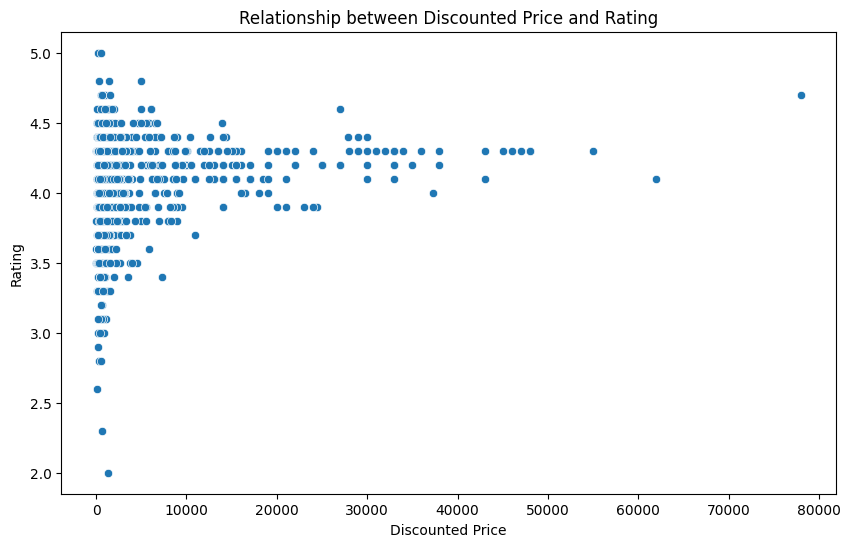

In [ ]:
#8.' What is the correlation between discounted_price and rating?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert 'discounted_price' to numeric, removing commas and currency symbols
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')

# Convert 'rating' to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Added this line to convert 'rating' to numeric

# Calculate correlation coefficient
correlation_coefficient = df['discounted_price'].corr(df['rating'])
print('Correlation Coefficient:', correlation_coefficient)

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Relationship between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

In [ ]:
#9. What are the Top 5 categories based on the highest ratings?
import pandas as pd

# Load the dataset
df = pd.read_csv('amazon.csv')

# Convert the 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate average rating
avg_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort by average rating in descending order
top_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)

# Print top categories
print(top_categories)

                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


Correlation Coefficient: 0.12033741712288648
                                             category  rating
57                      Computers&Accessories|Tablets     4.6
48  Computers&Accessories|NetworkingDevices|Networ...     4.5
62   Electronics|Cameras&Photography|Accessories|Film     4.5
38            Computers&Accessories|Components|Memory     4.5
81  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
Mean Absolute Error: 0.2096774868704983


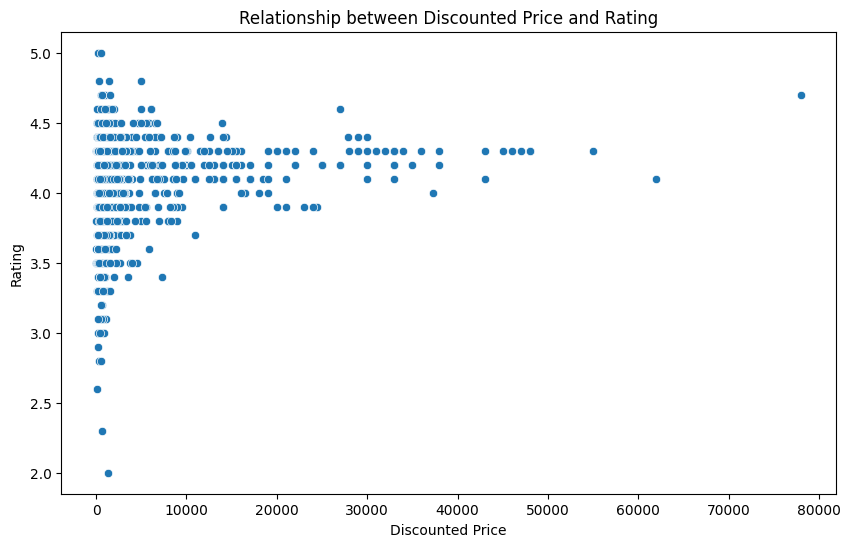

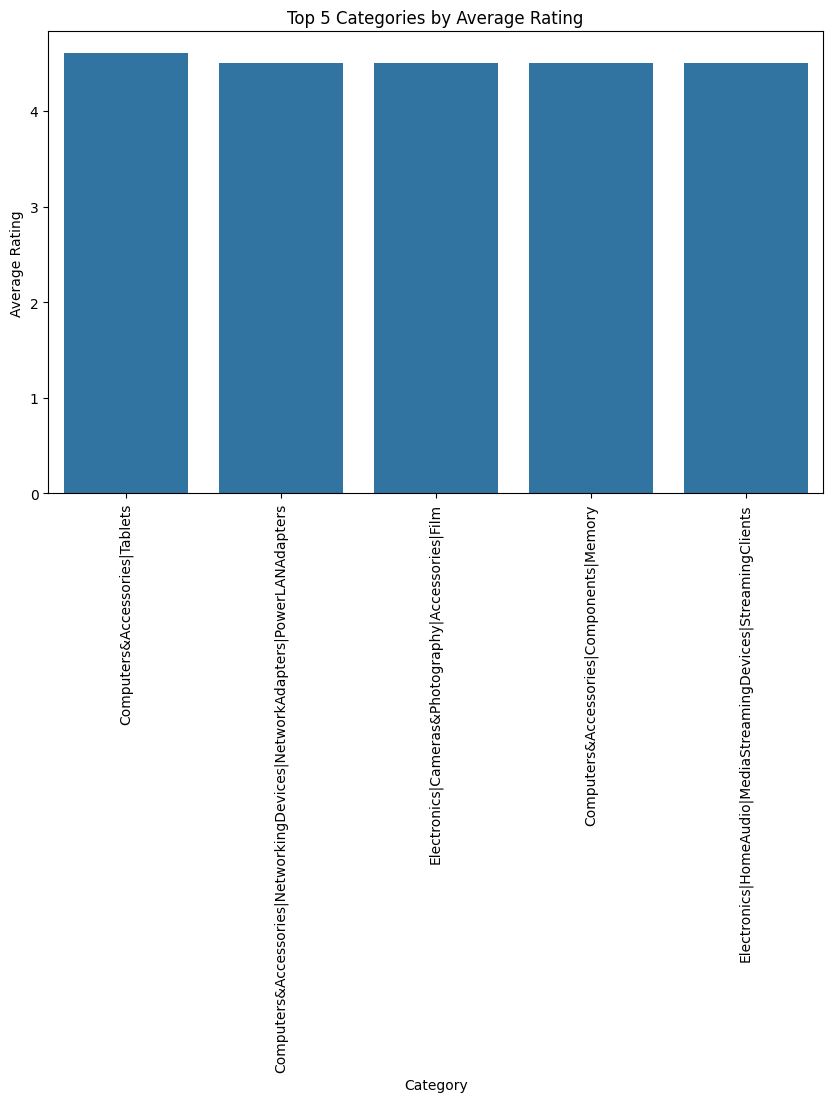

In [ ]:
#10. Identify any potential areas for improvement or optimization based on the data analysis?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('amazon.csv')

# Data Preprocessing
# Convert 'discounted_price' to numeric, removing commas and currency symbols
df['discounted_price'] = pd.to_numeric(df['discounted_price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
# Convert 'rating' to numeric, handling non-numeric values like empty strings and '|'
df['rating'] = pd.to_numeric(df['rating'].str.replace('|', '').str.strip(), errors='coerce')
# Drop rows with missing values in either 'discounted_price' or 'rating'
df = df.dropna(subset=['discounted_price', 'rating']) # Changed this line to drop rows with NaNs in specified columns

# Analysis
# 1. Correlation between discounted price and rating
# Remove rows with NaN values in 'discounted_price' and 'rating' before calculating correlation
correlation_coefficient = df[['discounted_price', 'rating']].dropna().corr().iloc[0, 1]
print('Correlation Coefficient:', correlation_coefficient)

# 2. Top 5 categories by average rating
avg_ratings = df.groupby('category')['rating'].mean().reset_index()
top_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)
print(top_categories)

# 3. Product pricing optimization
X = df[['discounted_price']]
y = df['rating']
# Remove rows with NaN values in X and y before splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # This line is now correct
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Visualization
# 1. Scatter plot of discounted price vs. rating
plt.figure(figsize=(10,6))
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.title('Relationship between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

# 2. Bar plot of top 5 categories by average rating
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='rating', data=top_categories)
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

##EDA-4

In [1]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Load the CSV file
df = pd.read_csv('spotify.csv')

Saving spotify.csv to spotify.csv


In [3]:
#1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful.

import pandas as pd

# Read the DataFrame
df = pd.read_csv('spotify.csv')

# Check for null values
print("Null Values Count:")
print(df.isnull().sum())

# Handle null values
# Option 1: Drop rows with null values
# df = df.dropna()

# Option 2: Fill null values with mean/median/mode
# df['column_name'] = df['column_name'].fillna(df['column_name'].mean())

# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())

# Handle duplicate rows
# Option 1: Drop duplicate rows
df = df.drop_duplicates()

# Verify the changes
print("\nUpdated Null Values Count:")
print(df.isnull().sum())
print("\nUpdated Duplicate Rows Count:", df.duplicated().sum())


Null Values Count:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate Rows Count: 27

Updated Null Values Count:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Updated Duplicate Rows Count: 0


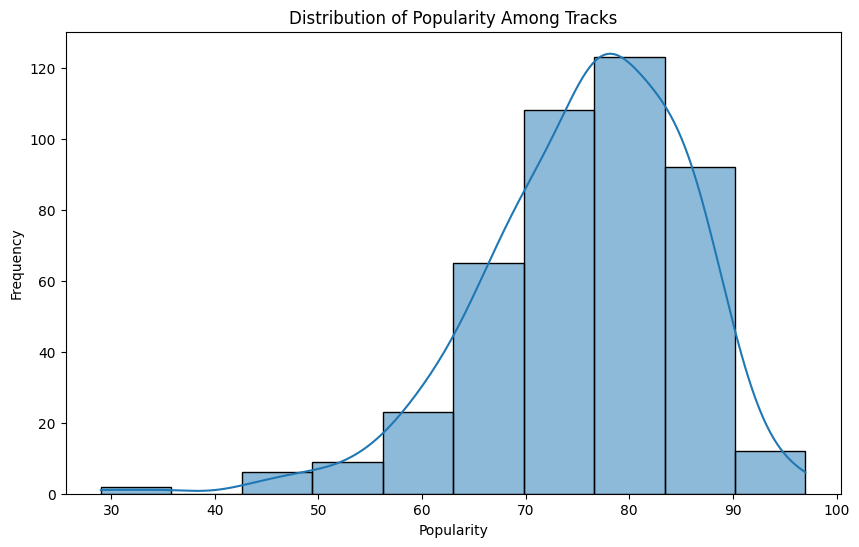

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Create a histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'], bins=10, kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


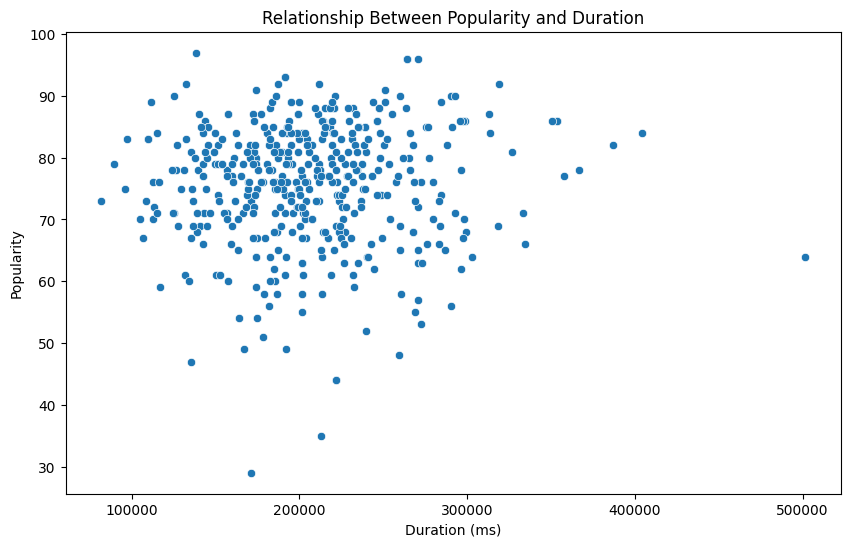

In [10]:
#3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Relationship Between Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


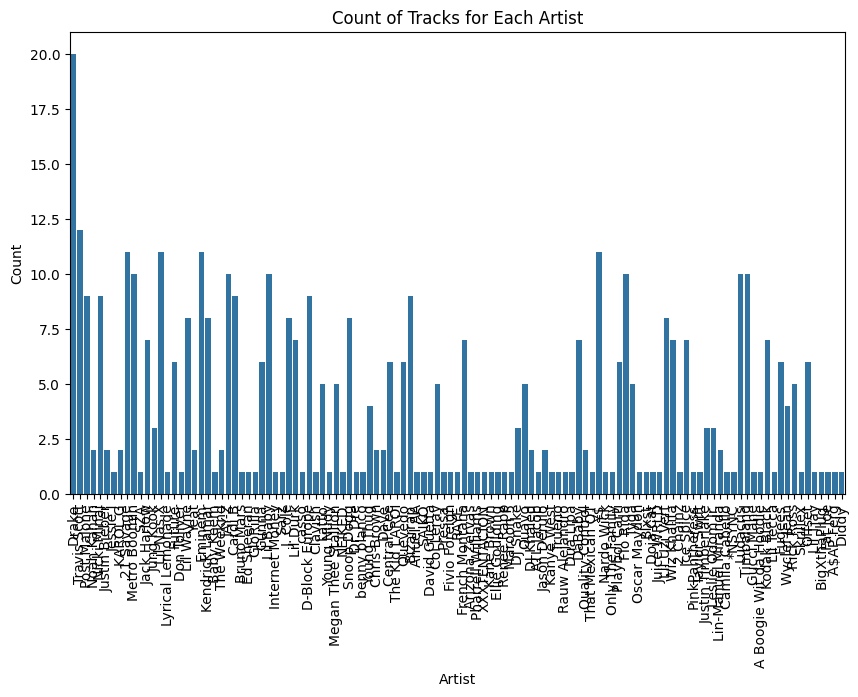

Artist with the highest number of tracks:
Artist
Drake    20
Name: count, dtype: int64


In [11]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')
plt.figure(figsize=(10,6))
sns.countplot(x='Artist', data=df)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Find the artist with the highest number of tracks
artist_counts = df['Artist'].value_counts()
print('Artist with the highest number of tracks:')
print(artist_counts.head(1))


In [12]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Sort the dataset by popularity in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Print the artist name and track name for each
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [13]:
#6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist?
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')
# Find the top 5 most popular artists
top_artists = df['Artist'].value_counts().head(5).index

# Filter the dataset for the top 5 most popular artists
top_artists_df = df[df['Artist'].isin(top_artists)]

# Calculate the average popularity for each artist
average_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order
average_popularity = average_popularity.sort_values(by='Popularity', ascending=False)

# Print the average popularity for each artist
print(average_popularity)


         Artist  Popularity
4  Travis Scott   87.000000
0     21 Savage   84.181818
2        Eminem   83.636364
1         Drake   83.500000
3     Lil Nas X   76.090909


In [14]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Find the top 5 most popular artists
top_artists = df['Artist'].value_counts().head(5).index

# Filter the dataset for the top 5 most popular artists
top_artists_df = df[df['Artist'].isin(top_artists)]

# Find the most popular track for each artist
most_popular_tracks = top_artists_df.loc[top_artists_df.groupby('Artist')['Popularity'].idxmax()]

# Print the artist and track name for each
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])



           Artist                               Track Name  Popularity
70      21 Savage                                   redrum          96
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80         Eminem                               Without Me          90
312     Lil Nas X                        THATS WHAT I WANT          81
30   Travis Scott               FE!N (feat. Playboi Carti)          93


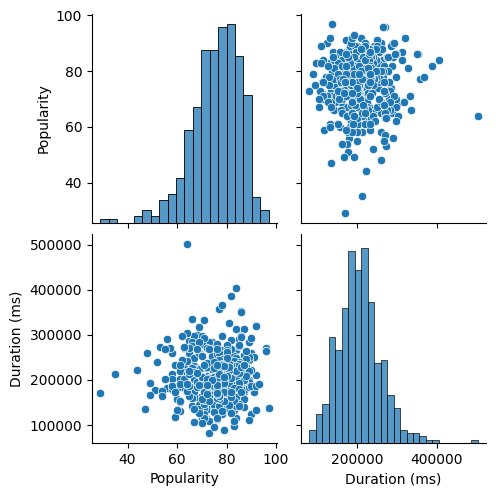

In [15]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')
# Select numerical columns
numerical_cols = ['Popularity', 'Duration (ms)']
numerical_df = df[numerical_cols]

# Create a pair plot
sns.pairplot(numerical_df)
plt.show()



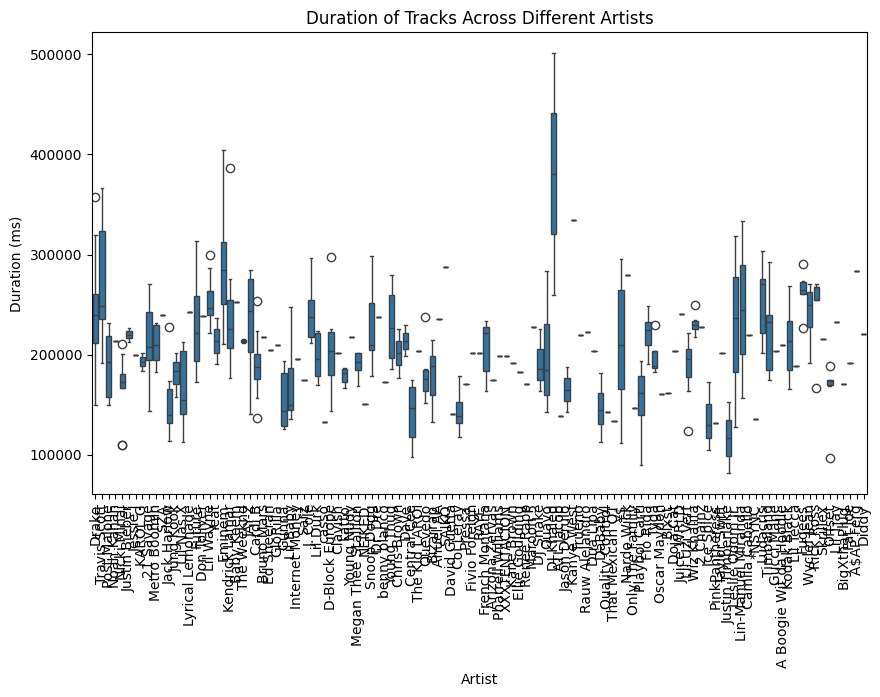

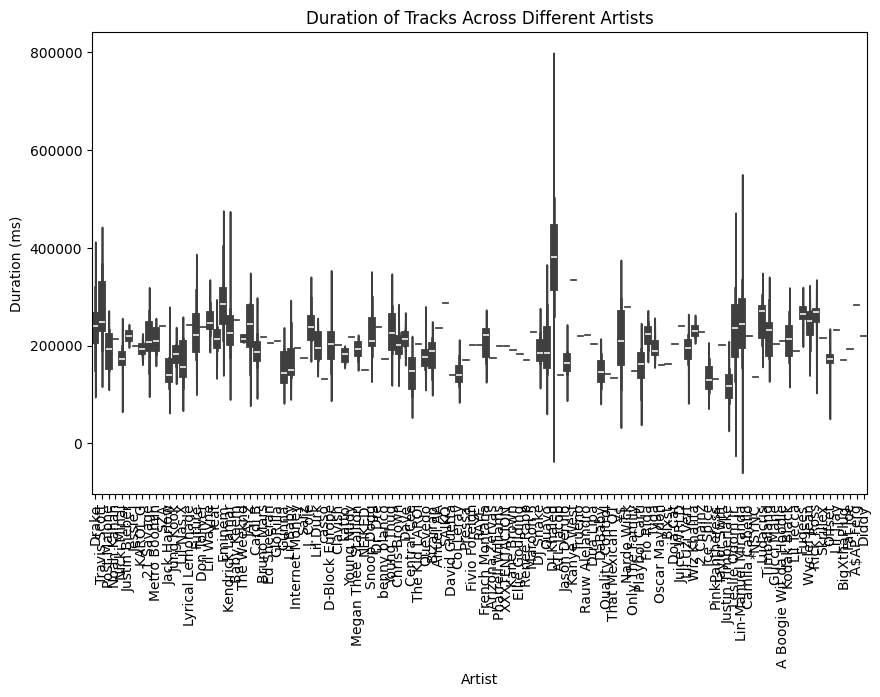

In [16]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot?
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Create a box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

# Create a violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Duration (ms)', data=df)
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.4% of the points cannot be plac

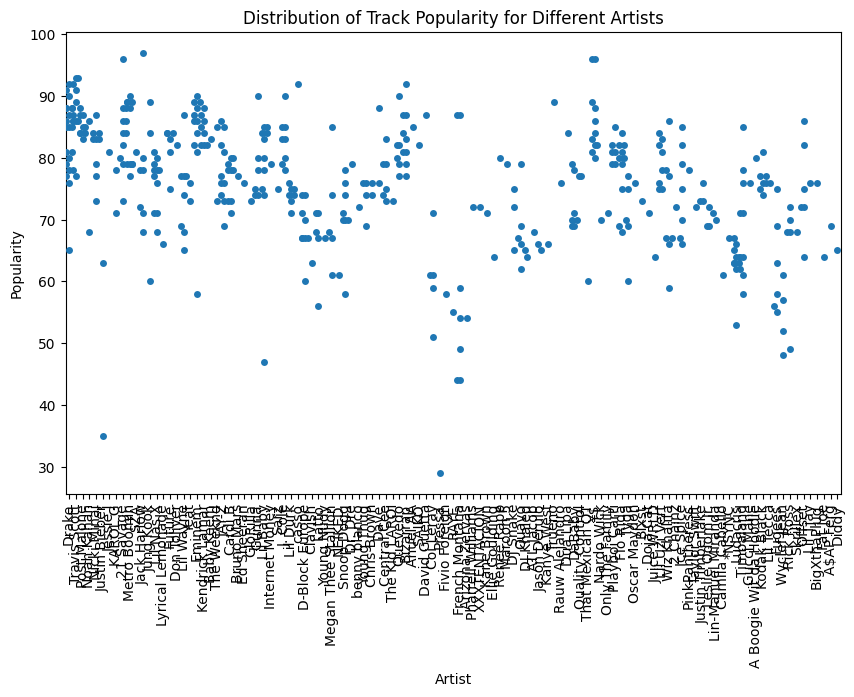

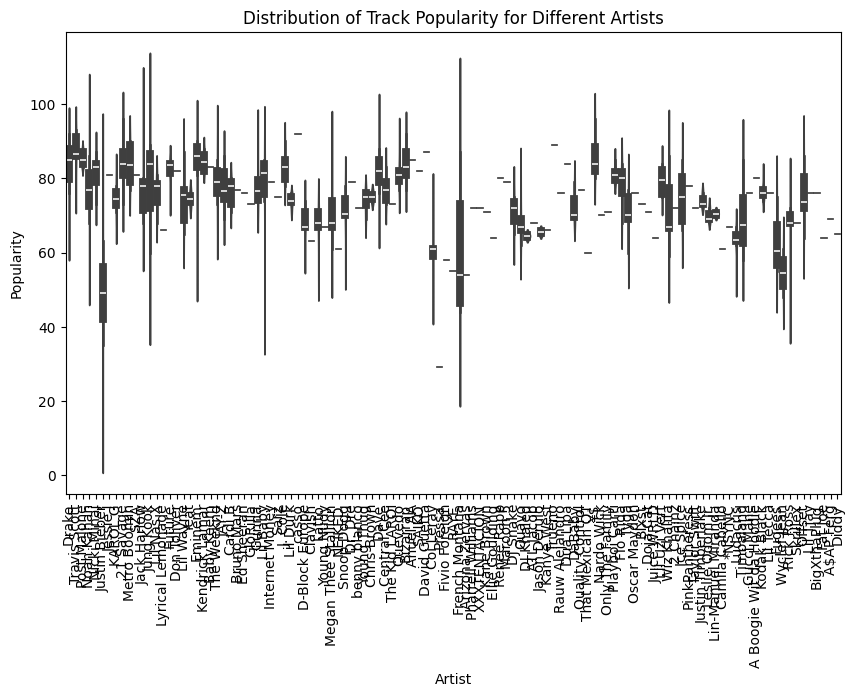

In [17]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.
import pandas as pd

# Load the dataset
df = pd.read_csv('spotify.csv')

# Create a swarm plot
plt.figure(figsize=(10,6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

# Create a violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Artist', y='Popularity', data=df)
plt.title('Distribution of Track Popularity for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
